# **Problem statement:**

 To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## Step 1: Load libraries and Read Data

In [1]:
import os
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-01-09 19:12:23.374236: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
data_dir_train = pathlib.Path('./Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('./Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
img__train = len(list(data_dir_train.glob("*/*.jpg")))
print('Train data size',img__train)
img__test = len(list(data_dir_test.glob("*/*.jpg")))
print('Test data size',img__test)

Train data size 2239
Test data size 118


## Step 2: Creating train & validation dataset 

In [5]:
# Parameters
batch_size = 32
img_height = 180
img_width = 180

In [7]:
# Training data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Validation data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


## Step 3: Dataset visualisation:

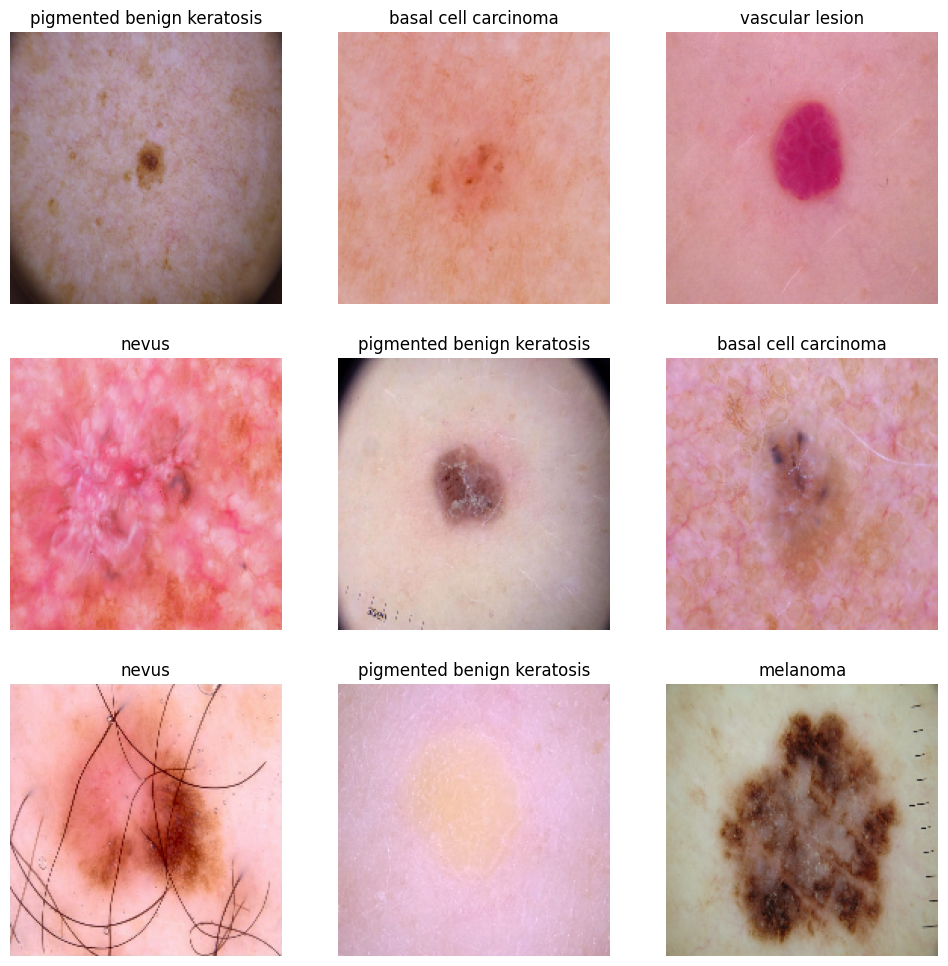

In [9]:
class_names = train_ds.class_names

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.imshow(images[i].numpy().astype("uint8"))

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Step 4: Base Model Building & training:

**Base Model**

In [11]:
classes = 9

model1 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(classes)
])

model1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [12]:
# Viewing the summary of model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [13]:
#Training the base model for 20 epochs
epochs = 20

base_model = model1.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 24s 335ms/step - loss: 1.9882 - accuracy: 0.2706 - val_loss: 1.7278 - val_accuracy: 0.3803
Epoch 2/20
56/56 [==============================] - 18s 318ms/step - loss: 1.6919 - accuracy: 0.3956 - val_loss: 1.5899 - val_accuracy: 0.4385
Epoch 3/20
56/56 [==============================] - 18s 316ms/step - loss: 1.4988 - accuracy: 0.4794 - val_loss: 1.4529 - val_accuracy: 0.5145
Epoch 4/20
56/56 [==============================] - 18s 317ms/step - loss: 1.4223 - accuracy: 0.4944 - val_loss: 1.3977 - val_accuracy: 0.5280
Epoch 5/20
56/56 [==============================] - 18s 320ms/step - loss: 1.3245 - accuracy: 0.5352 - val_loss: 1.3679 - val_accuracy: 0.5324
Epoch 6/20
56/56 [==============================] - 18s 319ms/step - loss: 1.3025 - accuracy: 0.5424 - val_loss: 1.4099 - val_accuracy: 0.5123
Epoch 7/20
56/56 [==============================] - 18s 320ms/step - loss: 1.2035 - accuracy: 0.5776 - val_loss: 1.3022 - val_accuracy: 0.5503

In [23]:
# Function to visualize results
def results(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(12,6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='upper right')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.show()

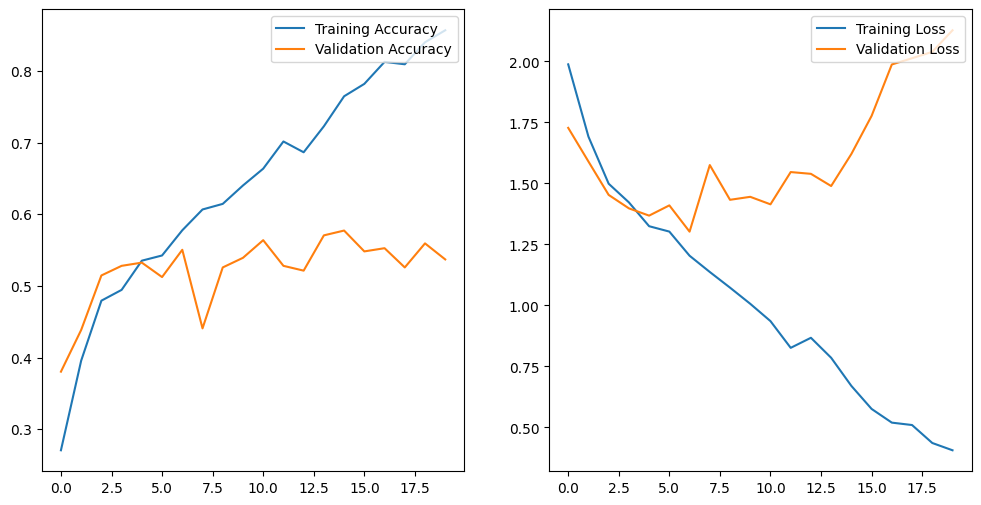

In [24]:
results(base_model)

Training accuracy is significantly higher than validation accuracy, as the graph illustrates. We also observe changes in the loss functions between the training and validation data around the 19th and 20th epochs. This is an obvious case of overfitting, where the model is unable to function adequately on the validation dataset because it has learned too much from the training dataset.

- **Training Accuracy: 85.66**
- **Validation Accuracy: 53.69**

## Step 5: Building a Model on the augmented data:

**Augmented Model**

In [25]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [26]:
model2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(classes)
])

model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [27]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [28]:
epochs = 20

aug_model = model2.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 21s 355ms/step - loss: 2.1119 - accuracy: 0.2026 - val_loss: 2.0112 - val_accuracy: 0.2282
Epoch 2/20
56/56 [==============================] - 20s 352ms/step - loss: 1.9462 - accuracy: 0.2734 - val_loss: 1.8274 - val_accuracy: 0.3311
Epoch 3/20
56/56 [==============================] - 20s 356ms/step - loss: 1.7749 - accuracy: 0.3415 - val_loss: 1.6623 - val_accuracy: 0.4832
Epoch 4/20
56/56 [==============================] - 20s 354ms/step - loss: 1.5714 - accuracy: 0.4358 - val_loss: 1.4985 - val_accuracy: 0.4810
Epoch 5/20
56/56 [==============================] - 20s 354ms/step - loss: 1.4676 - accuracy: 0.4888 - val_loss: 1.4385 - val_accuracy: 0.4922
Epoch 6/20
56/56 [==============================] - 20s 353ms/step - loss: 1.4151 - accuracy: 0.4967 - val_loss: 1.5542 - val_accuracy: 0.4698
Epoch 7/20
56/56 [==============================] - 20s 353ms/step - loss: 1.4440 - accuracy: 0.4860 - val_loss: 1.3577 - val_accuracy: 0.5459

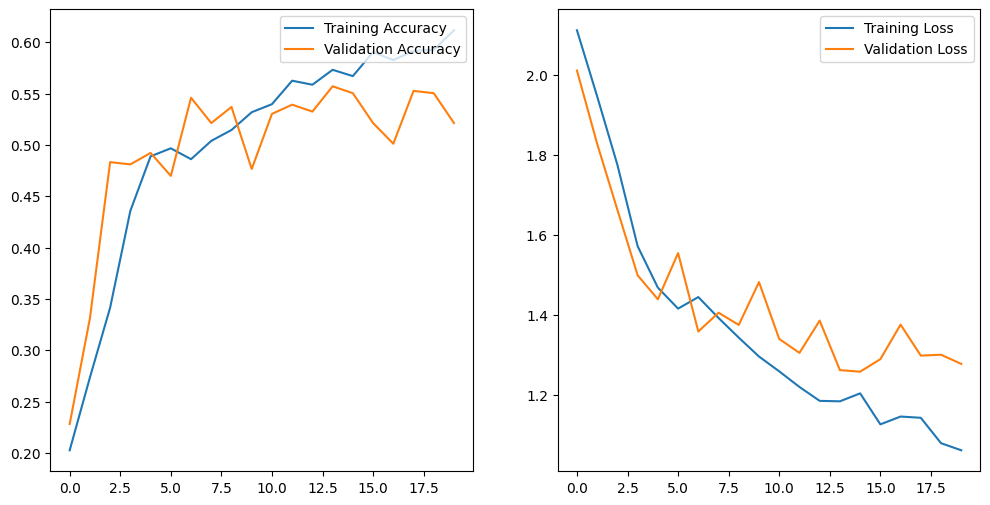

In [29]:
results(aug_model)

Compared to the baseline model, training accuracy has not risen, but the difference between training and validation accuracy has decreased. Furthermore, there is a slight improvement in validation accuracy compared to the original model. Additionally, the difference between validation loss and training loss is reduced. We also observe that the reduction in overfitting brought about by data augmentation.


- **Training Accuracy: 61.16**
- **Validation Accuracy: 52.13**

## Step 6: Managing Class distribution:

<BarContainer object of 9 artists>

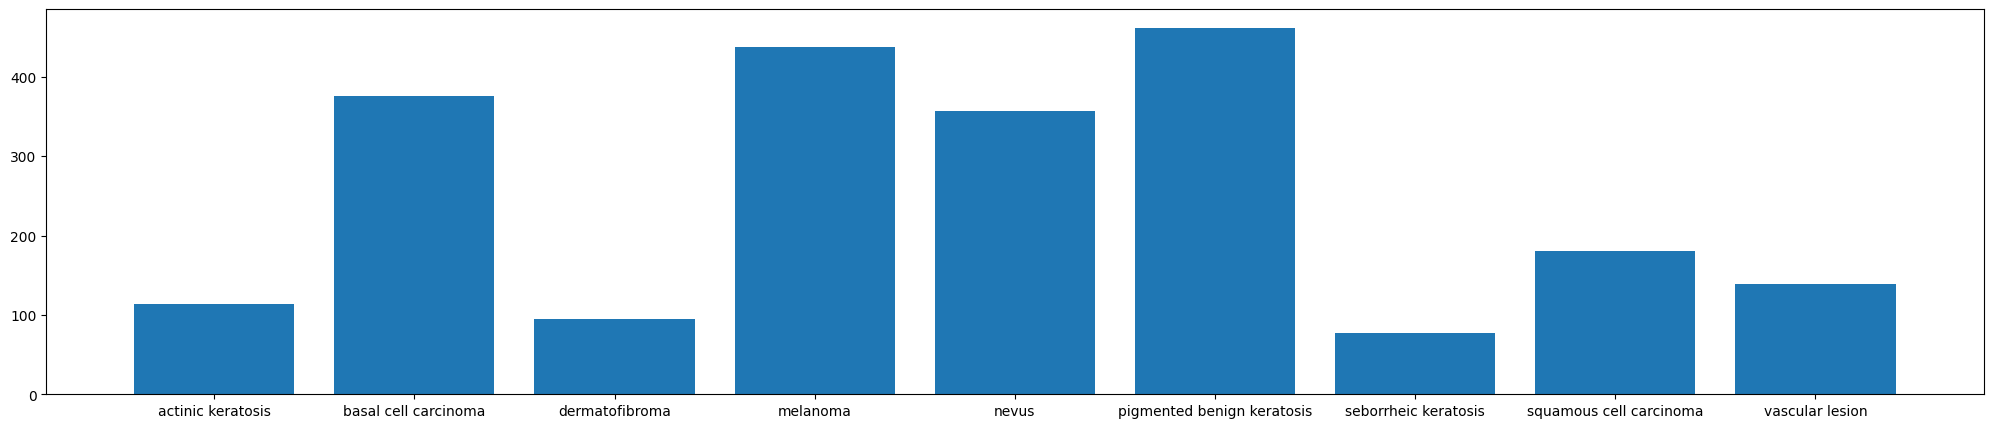

In [30]:
# Ploting the number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))
plt.figure(figsize=(25,5))
plt.bar(class_names,count)

1.   **Pigmented Benign keratosis classes dominate the data in terms of proportionate number of samples.**
2.   **Seborrheic keratosi class has the least number of samples.**

In [31]:
!pip install Augmentor

In [32]:
import Augmentor
path_to_training_dataset=str(data_dir_train)+'/'

# Adding 500 samples to each class
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE3C71B3E20>: 100%|█████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 187.45 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FE3C3284280>: 100%|███████████████████████████████████████████████████████| 500/500 [00:02<00:00, 209.87 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE45A4B2A60>: 100%|█████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 168.86 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FE3C2CFA370>: 100%|███████████████████████████████████████████████████████| 500/500 [00:16<00:00, 30.04 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE3C3C67C70>: 100%|██████████████████████████████████████████████████████████████████████████| 500/500 [00:18<00:00, 27.36 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE46B6D6100>: 100%|█████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 146.74 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FE3C2D79430>: 100%|███████████████████████████████████████████████████████| 500/500 [00:08<00:00, 61.18 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE45ABA1070>: 100%|█████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 143.96 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FE4553659A0>: 100%|█████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 135.70 Samples/s]


<BarContainer object of 9 artists>

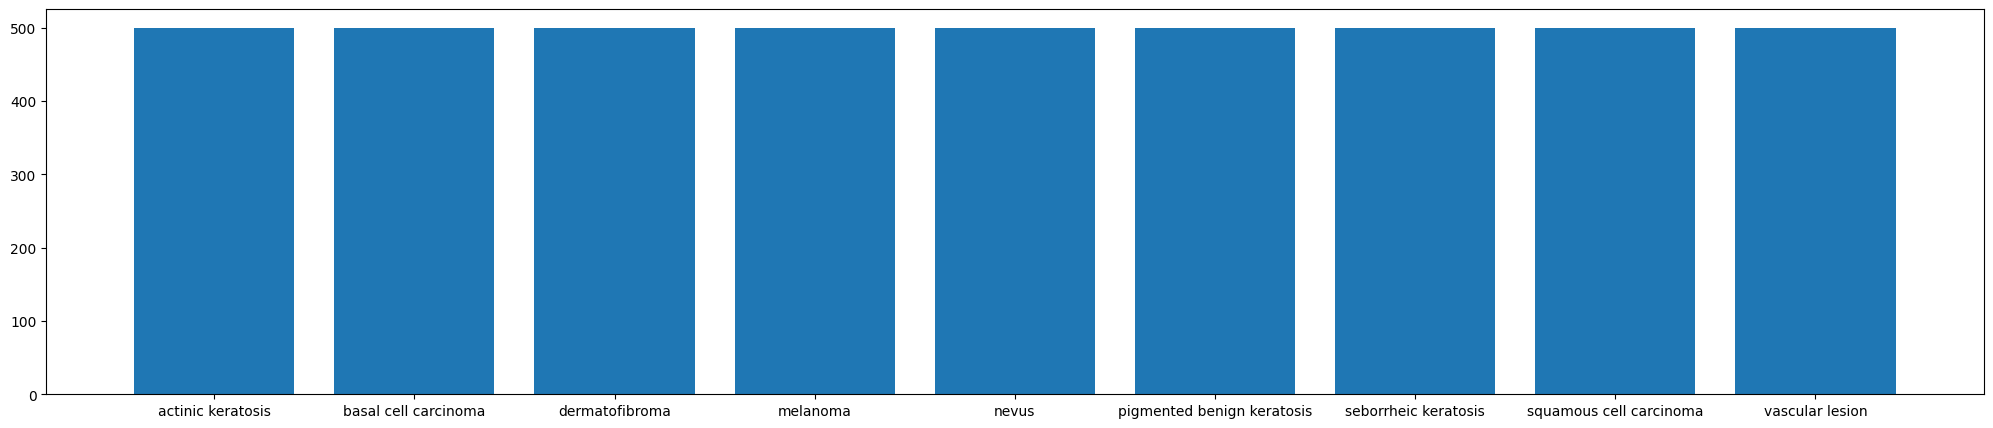

In [33]:
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'*/output/*.jpg'))))
plt.figure(figsize=(25,5))
plt.bar(class_names,count)

In [34]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [35]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [36]:
path_list=[]
lesion_list=[]
for name in class_names:
  for file in data_dir_train.glob(name+'/*.jpg'):
    path_list.append(str(file))
    lesion_list.append(name)

dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df=pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])

In [38]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df._append(df2)
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

In [39]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [40]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Step 7: Building a Model on the New Balanced Data:**

**Final Model**

In [41]:
model3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(classes)
])

# Viewing the summary of model
model3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [43]:
#Training the model for ~30 epochs
epochs = 30

final_model = model3.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/30
169/169 [==============================] - 64s 378ms/step - loss: 1.6994 - accuracy: 0.3615 - val_loss: 1.4201 - val_accuracy: 0.4439
Epoch 2/30
169/169 [==============================] - 59s 350ms/step - loss: 1.3750 - accuracy: 0.4878 - val_loss: 1.3531 - val_accuracy: 0.4781
Epoch 3/30
169/169 [==============================] - 60s 354ms/step - loss: 1.2001 - accuracy: 0.5621 - val_loss: 1.1212 - val_accuracy: 0.5805
Epoch 4/30
169/169 [==============================] - 59s 347ms/step - loss: 1.0132 - accuracy: 0.6376 - val_loss: 1.0384 - val_accuracy: 0.6295
Epoch 5/30
169/169 [==============================] - 67s 400ms/step - loss: 0.8619 - accuracy: 0.6940 - val_loss: 0.9112 - val_accuracy: 0.6696
Epoch 6/30
169/169 [==============================] - 57s 340ms/step - loss: 0.7312 - accuracy: 0.7378 - val_loss: 0.8079 - val_accuracy: 0.6964
Epoch 7/30
169/169 [==============================] - 59s 352ms/step - loss: 0.6213 - accuracy: 0.7765 - val_loss: 0.9157 - val_ac

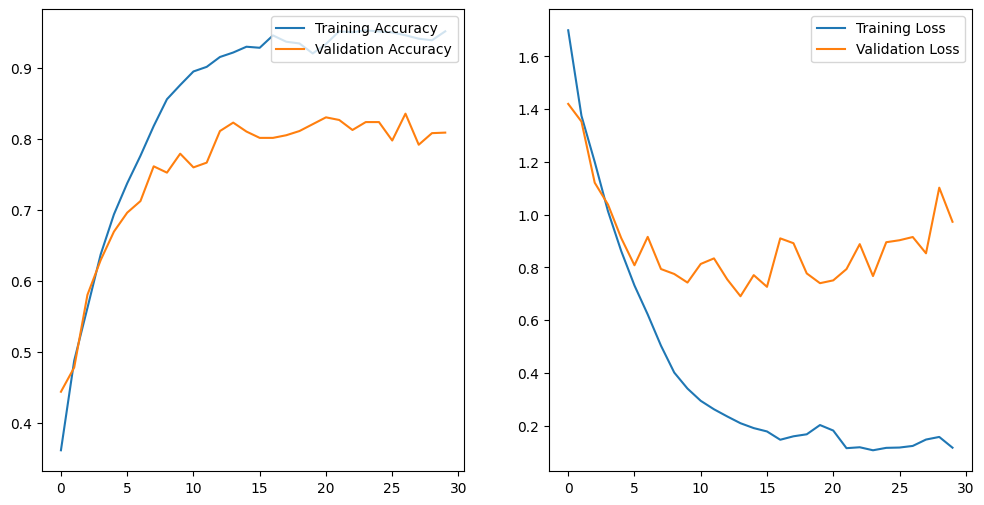

In [44]:
results(final_model)

Training and validation accuracy have significantly increased as a result of augmentation and class imbalance control. It is not an overfit model and can be considered as the final model.

- **Training Accuracy: 95.20**
- **Validation Accuracy: 80.92**